In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


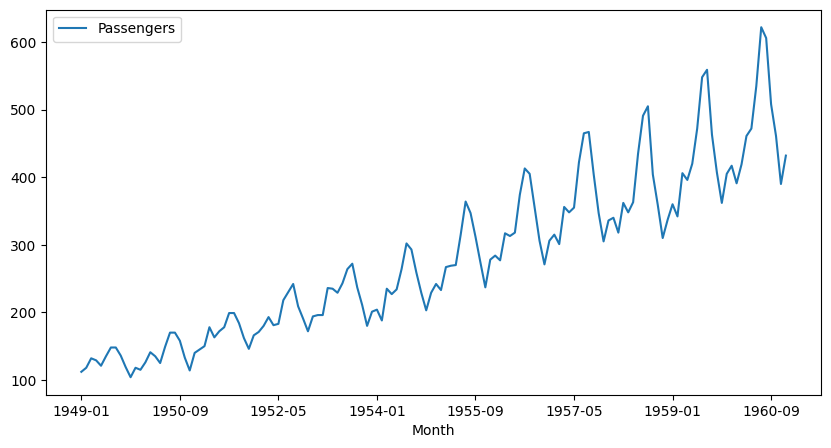

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Visualize the data
print(data.head())
data.plot(x='Month', y='Passengers', figsize=(10, 5))
plt.show()

# Preprocess the data

## Datetime formatting

In [3]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

## Select features and target

In [4]:
features = ['Passengers']
target = 'Passengers'

## Normalize the data

In [5]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

## Convert to numpy arrays

In [6]:
X = data[features].values
y = data[target].values

## Create sequences

In [7]:
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X, y, seq_length)

## Split into train and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the LSTM model

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(50))
model.add(Dense(1))

## Compile the model

In [10]:
model.compile(optimizer='adam', loss='mse')

## Train the model

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
6/6 [==============================] - 5s 197ms/step - loss: 0.1593 - val_loss: 0.0825
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0389 - val_loss: 0.0181
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0298 - val_loss: 0.0341
Epoch 4/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0230 - val_loss: 0.0157
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0172 - val_loss: 0.0179
Epoch 6/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0171 - val_loss: 0.0144
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0136 - val_loss: 0.0160
Epoch 8/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0153 - val_loss: 0.0155
Epoch 9/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0132 - val_loss: 0.0137
Epoch 10/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 11/100
6/6 [

## Plot training loss

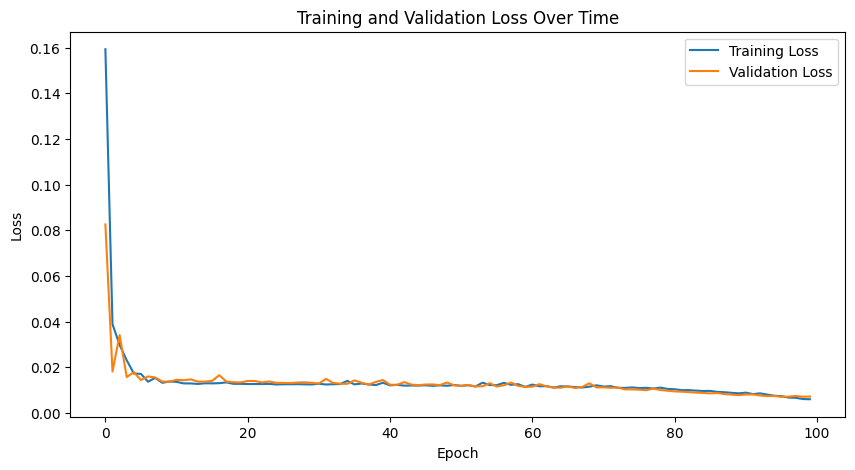

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

# Evaluate the model

In [13]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0046


## Make predictions

In [14]:
y_test_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


## Inverse transform the predictions and actual values

In [15]:
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = target_scaler.inverse_transform(y_test_pred)

## Visualize the predictions

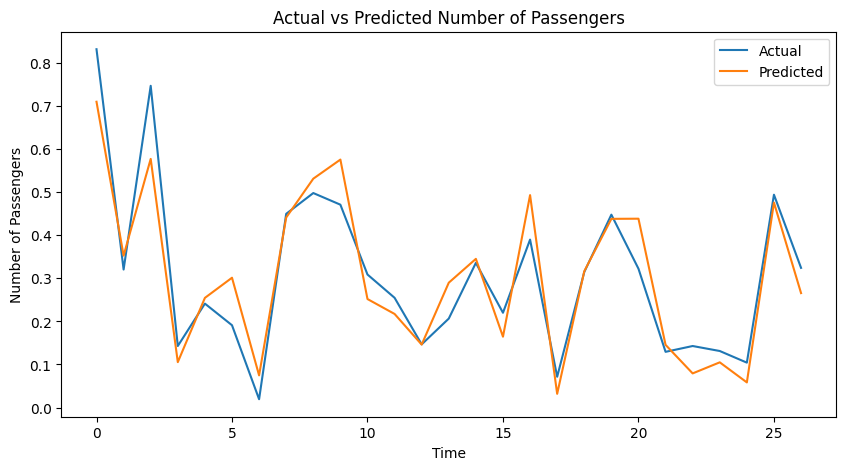

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_test_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Number of Passengers')
plt.legend()
plt.show()

## Calculate accuracy (e.g., Mean Absolute Percentage Error)

In [17]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_test_pred_inv)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 30.37%


# If you want to save the model

In [ ]:
model.save('lstm_airline_passengers.h5')

# Full code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Visualize the data
print(data.head())
data.plot(x='Month', y='Passengers', figsize=(10, 5))
plt.show()

# Preprocess the data
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Select features and target
features = ['Passengers']
target = 'Passengers'

# Normalize the data
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

# Convert to numpy arrays
X = data[features].values
y = data[target].values

# Create sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X, y, seq_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

# Make predictions
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = target_scaler.inverse_transform(y_test_pred)

# Visualize the predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_test_pred_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Number of Passengers')
plt.legend()
plt.show()

# Calculate accuracy (e.g., Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_test_pred_inv)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# If you want to save the model
model.save('lstm_airline_passengers.h5')